### Imports and definitions

#### Map 1

c:\Users\Louis\anaconda3\envs\RL\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2 0 0 1 1 2] [3 2 3 2 3 1]
['green', 'red', 'red', 'blue', 'blue', 'green']
{0: '0: N. America (3)', 1: '1: S. America (2)', 2: '2: Europe (3)', 3: '3: Africa (2)', 4: '4: Asia (3)', 5: '5: Oceania (1)'}


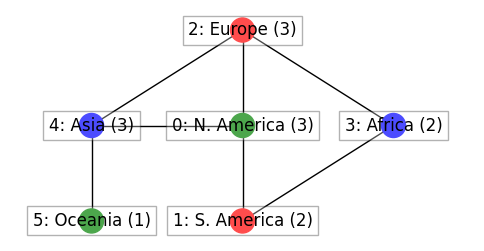

In [1]:
from utils.game import *
from utils.agent import *
from utils.world import *
from utils.viz import *
import numpy as np
import random
import torch
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

map_graph = np.array([
    [0, 1, 1, 0, 1, 0],
    [1, 0, 0, 1, 0, 0],
    [1, 0, 0, 1, 1, 0],
    [0, 1, 1, 0, 0, 0],
    [1, 0, 1, 0, 0, 1],
    [0, 0, 0, 0, 1, 0]
])
G = nx.from_numpy_array(map_graph)
pos = nx.spring_layout(G)

# Nb player
nb_player = 3
reinforcement_param = 3

# Vector of presence on the map
# P[i, j] = #troops of player i in zone j
presence_map_start = np.array([
    [0, 2, 3, 0, 0, 0],
    [0, 0, 0, 2, 3, 0],
    [3, 0, 0, 0, 0, 1]
])

layout = {0: np.array([0.5, 0.5]),
           1: np.array([0.5, 0.3]),
           2: np.array([0.5, 0.7]),
           3: np.array([0.7, 0.5]),
           4: np.array([0.3, 0.5]),
           5: np.array([0.3, 0.3])
           }

countries = {0 : "N. America",
            1 : "S. America",
            2 : "Europe",
            3 : "Africa",
            4 : "Asia",
            5 : "Oceania"
            }

owner = np.argmax(presence_map_start, axis=0)
troops = np.max(presence_map_start, axis=0)

colors = {0: 'red', 1: 'blue', 2: 'green'}
colors = [colors[i] for i in owner]


labels = {i:f"{i}: {countries[i]} ({troops[i]})" for i in range(map_graph.shape[0])}

print(owner, troops)
print(colors)
print(labels)

plt.figure(figsize=(6,3))
plt.margins(x=0.2)
G = nx.from_numpy_array(map_graph)
label_options = {"ec": "k", "fc": "white", "alpha": 0.3}
nx.draw(G, layout, node_color=colors, labels=labels, bbox=label_options)
plt.show()

#### Map 2

[0 0 1 0 1 2 1 2 0 2 2] [2 2 3 2 2 2 2 2 1 2 2]
['red', 'red', 'blue', 'red', 'blue', 'green', 'blue', 'green', 'red', 'green', 'green']
{0: '0: UK (2)', 1: '1: France (2)', 2: '2: Germany (3)', 3: '3: Russia (2)', 4: '4: Austria-Hungary (2)', 5: '5: Italy (2)', 6: '6: Turkey (2)', 7: '7: Iberia (2)', 8: '8: Benelux (1)', 9: '9: Scandinavia (2)', 10: '10: Balkans (2)'}


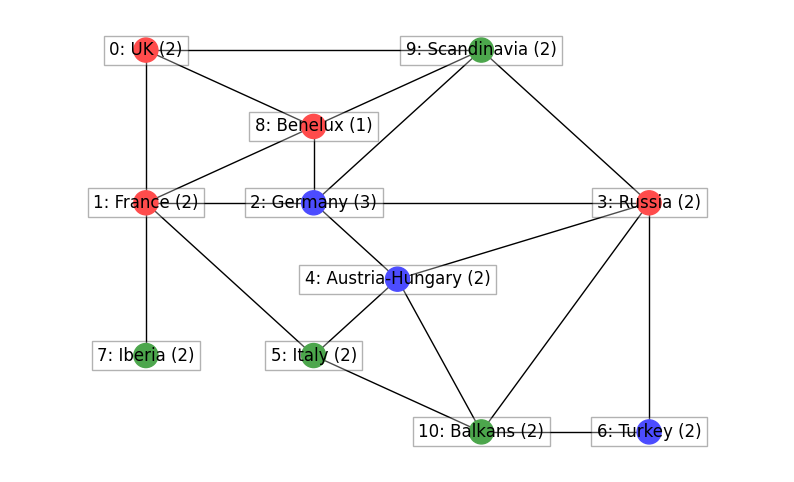

In [5]:
from utils.game import *
from utils.agent import *
from utils.world import *
from utils.viz import *
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

countries = {0 : "UK",
            1 : "France",
            2 : "Germany",
            3 : "Russia",
            4 : "Austria-Hungary",
            5 : "Italy",
            6 : "Turkey",
            7: "Iberia",
            8: "Benelux",
            9: "Scandinavia",
            10: "Balkans"
            }

map_graph = np.array([
    [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
    [1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0],
    [0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0],
    [0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
    [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1],
    [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0],
    [1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
])
G = nx.from_numpy_array(map_graph)
pos = nx.spring_layout(G)

# Nb player
nb_player = 3
reinforcement_param = 2

# Vector of presence on the map
# P[i, j] = #troops of player i in zone j
presence_map_start = np.array([
    [2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 3, 0, 2, 0, 2, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2]
])

layout = {0: np.array([0.1, 0.7]),
        1: np.array([0.1, 0.5]),
        2: np.array([0.3, 0.5]),
        3: np.array([0.7, 0.5]),
        4: np.array([0.4, 0.4]),
        5: np.array([0.3, 0.3]),
        6: np.array([0.7, 0.2]),
        7: np.array([0.1, 0.3]),
        8: np.array([0.3, 0.6]),
        9: np.array([0.5, 0.7]),
        10: np.array([0.5, 0.2])
           }

owner = np.argmax(presence_map_start, axis=0)
troops = np.max(presence_map_start, axis=0)

colors = {0: 'red', 1: 'blue', 2: 'green'}
colors = [colors[i] for i in owner]


labels = {i:f"{i}: {countries[i]} ({troops[i]})" for i in range(map_graph.shape[0])}

print(owner, troops)
print(colors)
print(labels)

plt.figure(figsize=(10,6))
plt.margins(x=0.2)
G = nx.from_numpy_array(map_graph)
label_options = {"ec": "k", "fc": "white", "alpha": 0.3}
nx.draw(G, layout, node_color=colors, labels=labels, bbox=label_options)
plt.show()

### Basic tests

Generate images of a game

In [6]:
# Start
game = Game(map_graph=map_graph, presence_map=presence_map_start, nb_players=nb_player,
            countries=countries, layout=layout, label_options=label_options, colors=colors,
            reinforcement_param=reinforcement_param)

game.agents = [RandomAgent() for _ in range(nb_player)]

# Play some turns
game.run_and_save()


c:\Users\Louis\Documents\CentraleSupelec\3A_RL\Risk_RL\utils\viz.py:65: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))
c:\Users\Louis\Documents\CentraleSupelec\3A_RL\Risk_RL\utils\viz.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Evaluate a Random agent

Evaluation: 100%|██████████| 1000/1000 [00:09<00:00, 109.73it/s]

Win rate: 0.455
Defeat rate: 0.545
Tie rate: 0.0
Average number of turns: [16, 20, 28, 22, 21, 32, 20, 17, 41, 26, 21, 21, 15, 27, 38, 33, 15, 24, 14, 13, 45, 24, 18, 24, 13, 33, 23, 32, 24, 32, 21, 22, 80, 38, 23, 32, 35, 18, 40, 30, 24, 35, 24, 46, 29, 21, 39, 30, 14, 29, 26, 32, 20, 24, 30, 19, 29, 14, 25, 22, 26, 38, 22, 47, 34, 25, 16, 16, 50, 25, 25, 22, 29, 22, 35, 44, 16, 32, 26, 26, 16, 48, 18, 17, 16, 21, 18, 37, 16, 49, 25, 24, 39, 48, 37, 11, 22, 28, 15, 21, 13, 29, 40, 35, 17, 29, 38, 24, 17, 50, 36, 38, 19, 28, 16, 17, 30, 24, 23, 21, 18, 13, 53, 28, 27, 41, 21, 36, 40, 17, 38, 35, 21, 19, 22, 21, 34, 36, 14, 20, 28, 24, 16, 15, 25, 39, 31, 70, 28, 12, 27, 27, 36, 25, 13, 18, 29, 44, 20, 47, 19, 28, 17, 20, 31, 15, 26, 20, 15, 36, 22, 40, 12, 30, 16, 20, 24, 9, 24, 10, 18, 18, 14, 49, 22, 30, 21, 15, 40, 20, 17, 20, 15, 31, 27, 17, 18, 16, 16, 33, 15, 25, 24, 26, 19, 24, 23, 19, 22, 19, 29, 42, 41, 24, 29, 25, 17, 22, 22, 16, 13, 16, 29, 19, 77, 29, 28, 53, 47, 35, 35, 31

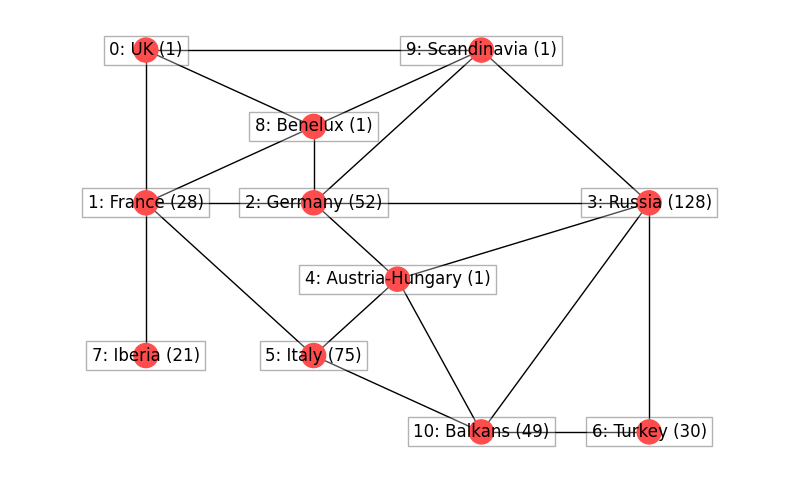

In [7]:
game = Game(map_graph=map_graph, presence_map=presence_map_start, nb_players=nb_player,
            countries=countries, layout=layout, label_options=label_options, colors=colors,
            reinforcement_param=reinforcement_param)

game.agents = [RandomAgent(), RandomAgent(), RandomAgent()]

game.reset_world()
win_rate, defeat_rate, tie_rate, nb_turns = game.eval_REINFORCE(num_games=1000, max_turns=100)

print(f"Win rate: {win_rate}")
print(f"Defeat rate: {defeat_rate}")
print(f"Tie rate: {tie_rate}")
print(f"Average number of turns: {nb_turns}")

# Plot the final state of the game
game.visualize()

Train and evaluate an Agent

Training:   0%|          | 0/100 [00:00<?, ?it/s]c:\Users\Louis\anaconda3\envs\RL\lib\site-packages\torch\nn\functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
c:\Users\Louis\Documents\CentraleSupelec\3A_RL\Risk_RL\utils\game.py:398: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:485.)
  if deploy_policy_loss.grad is not None:
c:\Users\Louis\Documents\CentraleSupelec\3A_RL\Risk_RL\utils\game.py:403: 

Win rate: 0.474
Defeat rate: 0.526
Tie rate: 0.0
Average number of turns: 28.372


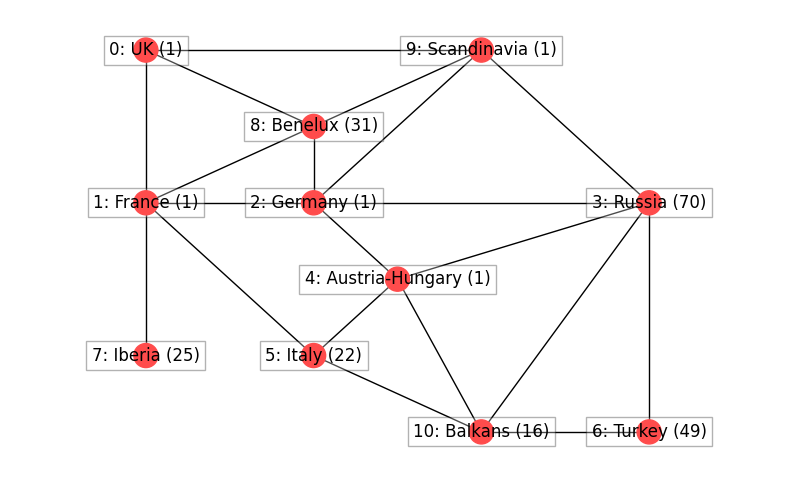

In [9]:
game = Game(map_graph=map_graph, presence_map=presence_map_start, nb_players=nb_player,
            countries=countries, layout=layout, label_options=label_options, colors=colors,
            reinforcement_param=reinforcement_param)

# Call a new agent and set it to train mode
Agent = PolicyGradientAgent(nb_territories=game.presence_map.shape[1])
Agent.deploy_policy.train()
Agent.attack_policy.train()
Agent.fortify_policy.train()

game.agents = [Agent, RandomAgent(), RandomAgent()]

game.reset_world()
game.train_REINFORCE(num_games=100, max_turns=100)

game.reset_world()
win_rate, defeat_rate, tie_rate, nb_turns = game.eval_REINFORCE(num_games=500, max_turns=100)

print(f"Win rate: {win_rate}")
print(f"Defeat rate: {defeat_rate}")
print(f"Tie rate: {tie_rate}")
print(f"Average number of turns: {np.mean(nb_turns)}")

# Plot the final state of the game
game.visualize()

### Random Agent Baseline

In [16]:
# Plot the win, defeat and tie rate in function of the number of training games

win_rate_history = []
defeat_rate_history = []
tie_rate_history = []
nb_turns_history = []

game = Game(map_graph=map_graph, presence_map=presence_map_start, nb_players=nb_player,
            countries=countries, layout=layout, label_options=label_options, colors=colors,
            reinforcement_param=reinforcement_param)

game.agents = [RandomAgent(), RandomAgent(), RandomAgent()]
game.reset_world()

win_rate, defeat_rate, tie_rate, nb_turns = game.eval_REINFORCE(num_games=500, max_turns=100, disp_tqdm=False)

# Print metrics
print("Win rate: ", win_rate)
print("Defeat rate: ", defeat_rate)
print("Tie rate: ", tie_rate)
print("Avg nb of turns: ", np.mean(nb_turns))

Win rate:  0.472
Defeat rate:  0.528
Tie rate:  0.0
Avg nb of turns:  26.906


### Policy Gradient Agent

Train agents on different numbers of games and save their policy

100%|██████████| 3/3 [00:32<00:00, 10.77s/it]


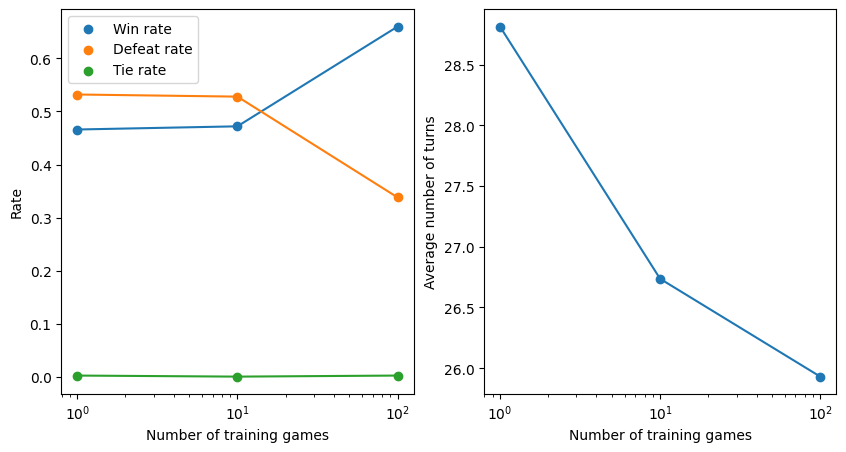

In [37]:
# Plot the win, defeat and tie rate in function of the number of training games
training_games = [0, 1, 10, 25, 50, 100, 200]
training_games = [1, 10, 100]
win_rate_history = []
defeat_rate_history = []
tie_rate_history = []
nb_turns_history = []

learning_rate = 1e-2
deploy_hidden_size = 16
attack_hidden_size = 16

# Fix a random seed for reproducibility and initialization of the weights
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

for nb_games in tqdm(training_games):

    game = Game(map_graph=map_graph, presence_map=presence_map_start, nb_players=nb_player,
                countries=countries, layout=layout, label_options=label_options, colors=colors,
                reinforcement_param=reinforcement_param)

    # Call a new agent and set it to train mode
    Agent = PolicyGradientAgent(learning_rate=learning_rate,
                                deploy_hidden_size=deploy_hidden_size,
                                attack_fortify_hidden_size=attack_hidden_size,
                                nb_territories=game.presence_map.shape[1])
    Agent.deploy_policy.train()
    Agent.attack_policy.train()
    Agent.fortify_policy.train()

    game.agents = [Agent, RandomAgent(), RandomAgent()]

    game.reset_world()
    game.train_REINFORCE(num_games=nb_games, max_turns=100, disp_tqdm=False)
    win_rate, defeat_rate, tie_rate, nb_turns = game.eval_REINFORCE(num_games=500, max_turns=100, disp_tqdm=False)
    win_rate_history.append(win_rate)
    defeat_rate_history.append(defeat_rate)
    tie_rate_history.append(tie_rate)
    nb_turns_history.append(np.mean(nb_turns))

    savepath = f"./models/PG_{nb_games}_games_{game.presence_map.shape[1]}_territories/"
    os.makedirs(os.path.dirname(savepath), exist_ok=True)
    game.agents[0].save(savepath)
    # Write a summary of the parameters in a text file
    with open(savepath + "summary.txt", "w") as f:
        f.write(f"Learning rate: {learning_rate}\nDeploy hidden size: {deploy_hidden_size} \n" +
                f"Attack hidden size: {attack_hidden_size} \nSeed: {seed} \nNb games: {nb_games} \n" +
                f"Average number of turns: {np.mean(nb_turns)} \n" +
                f"Number of territories: {game.presence_map.shape[1]}\n" +
                f"Win rate: {win_rate} \nDefeat rate: {defeat_rate} \nTie rate: {tie_rate}")


# Scatterplots with line between points
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(training_games, win_rate_history, label="Win rate")
plt.plot(training_games, win_rate_history)
plt.scatter(training_games, defeat_rate_history, label="Defeat rate")
plt.plot(training_games, defeat_rate_history)
plt.scatter(training_games, tie_rate_history, label="Tie rate")
plt.plot(training_games, tie_rate_history)
plt.legend()
plt.xlabel("Number of training games")
plt.ylabel("Rate")
plt.xscale('log')

plt.subplot(1,2,2)
plt.scatter(training_games, nb_turns_history)
plt.plot(training_games, nb_turns_history)
plt.xlabel("Number of training games")
plt.ylabel("Average number of turns")
plt.xscale('log')

plt.show()


Load an agent and play with it (against random agents)

In [38]:
deploy_hidden_size = 16
attack_hidden_size = 16
nb_territories = 11
nb_games = 100

if nb_territories == 11:
    reinforcement_param = 2
elif nb_territories == 6:
    reinforcement_param = 3

load_path = f"./models/PG_{nb_games}_games_{nb_territories}_territories/"


# Call a new agent and set it to train mode
Agent = PolicyGradientAgent(deploy_hidden_size=deploy_hidden_size,
                            attack_fortify_hidden_size=attack_hidden_size,
                            nb_territories=nb_territories)
Agent.load(load_path)

# Evaluate the agent over some games
game = Game(map_graph=map_graph, presence_map=presence_map_start, nb_players=nb_player,
            countries=countries, layout=layout, label_options=label_options, colors=colors,
            reinforcement_param=reinforcement_param)
game.agents = [Agent, RandomAgent(), RandomAgent()]
win_rate, defeat_rate, tie_rate, nb_turns = game.eval_REINFORCE(num_games=500, max_turns=100, disp_tqdm=False)

# Print metrics
print("Win rate: ", win_rate)
print("Defeat rate: ", defeat_rate)
print("Tie rate: ", tie_rate)
print("Avg nb of turns: ", np.mean(nb_turns))


Win rate:  0.688
Defeat rate:  0.312
Tie rate:  0.0
Avg nb of turns:  25.448


Load an agent and make it play against himself

In [39]:
deploy_hidden_size = 16
attack_hidden_size = 16
nb_territories = 11
nb_games = 100

if nb_territories == 11:
    reinforcement_param = 2
elif nb_territories == 6:
    reinforcement_param = 3

load_path = f"./models/PG_{nb_games}_games_{nb_territories}_territories/"



# Call a new agent and set it to train mode
Agent = PolicyGradientAgent(deploy_hidden_size=deploy_hidden_size,
                            attack_fortify_hidden_size=attack_hidden_size,
                            nb_territories=nb_territories)
Agent.load(load_path)

# Evaluate the agent over some games
game = Game(map_graph=map_graph, presence_map=presence_map_start, nb_players=nb_player,
            countries=countries, layout=layout, label_options=label_options, colors=colors,
            reinforcement_param=reinforcement_param)
game.agents = [Agent, Agent, Agent]
win_rate, defeat_rate, tie_rate, nb_turns = game.eval_REINFORCE(num_games=500, max_turns=100, disp_tqdm=False)

# Print metrics
print("Win rate: ", win_rate)
print("Defeat rate: ", defeat_rate)
print("Tie rate: ", tie_rate)
print("Avg nb of turns: ", np.mean(nb_turns))


Win rate:  0.602
Defeat rate:  0.396
Tie rate:  0.002
Avg nb of turns:  30.844


Load an agent as player 2 and see if it decreases a RandomAgent win rate as player 1

In [40]:
deploy_hidden_size = 16
attack_hidden_size = 16
nb_territories = 11
nb_games = 10

if nb_territories == 11:
    reinforcement_param = 2
elif nb_territories == 6:
    reinforcement_param = 3

load_path = f"./models/PG_{nb_games}_games_{nb_territories}_territories/"



# Call a new agent and set it to train mode
Agent = PolicyGradientAgent(deploy_hidden_size=deploy_hidden_size,
                            attack_fortify_hidden_size=attack_hidden_size,
                            nb_territories=nb_territories)
Agent.load(load_path)

# Evaluate the agent over some games
game = Game(map_graph=map_graph, presence_map=presence_map_start, nb_players=nb_player,
            countries=countries, layout=layout, label_options=label_options, colors=colors,
            reinforcement_param=reinforcement_param)
game.agents = [RandomAgent(), Agent, RandomAgent()]
win_rate, defeat_rate, tie_rate, nb_turns = game.eval_REINFORCE(num_games=500, max_turns=100, disp_tqdm=False)

# Print metrics
print("Win rate: ", win_rate)
print("Defeat rate: ", defeat_rate)
print("Tie rate: ", tie_rate)
print("Avg nb of turns: ", np.mean(nb_turns))


Win rate:  0.468
Defeat rate:  0.532
Tie rate:  0.0
Avg nb of turns:  27.174


Same but Agent is now player 3

In [41]:
deploy_hidden_size = 16
attack_hidden_size = 16
nb_territories = 11
nb_games = 10

if nb_territories == 11:
    reinforcement_param = 2
elif nb_territories == 6:
    reinforcement_param = 3

load_path = f"./models/PG_{nb_games}_games_{nb_territories}_territories/"



# Call a new agent and set it to train mode
Agent = PolicyGradientAgent(deploy_hidden_size=deploy_hidden_size,
                            attack_fortify_hidden_size=attack_hidden_size,
                            nb_territories=nb_territories)
Agent.load(load_path)

# Evaluate the agent over some games
game = Game(map_graph=map_graph, presence_map=presence_map_start, nb_players=nb_player,
            countries=countries, layout=layout, label_options=label_options, colors=colors,
            reinforcement_param=reinforcement_param)
game.agents = [RandomAgent(), RandomAgent(), Agent]
win_rate, defeat_rate, tie_rate, nb_turns = game.eval_REINFORCE(num_games=500, max_turns=100, disp_tqdm=False)

# Print metrics
print("Win rate: ", win_rate)
print("Defeat rate: ", defeat_rate)
print("Tie rate: ", tie_rate)
print("Avg nb of turns: ", np.mean(nb_turns))


Win rate:  0.346
Defeat rate:  0.654
Tie rate:  0.0
Avg nb of turns:  26.88


Load an agent and plot images of the game

In [11]:
deploy_hidden_size = 32
attack_hidden_size = 32
nb_territories = 11
nb_games = 1

if nb_territories == 11:
    reinforcement_param = 2
elif nb_territories == 6:
    reinforcement_param = 3

load_path = f"./models/PG_{nb_games}_games_{nb_territories}_territories/"


# Call a new agent and set it to train mode
Agent = PolicyGradientAgent(deploy_hidden_size=deploy_hidden_size,
                            attack_fortify_hidden_size=attack_hidden_size,
                            nb_territories=nb_territories)
Agent.load(load_path)

# Evaluate the agent over some games
game = Game(map_graph=map_graph, presence_map=presence_map_start, nb_players=nb_player,
            countries=countries, layout=layout, label_options=label_options, colors=colors,
            reinforcement_param=reinforcement_param)
game.agents = [Agent, RandomAgent(), RandomAgent()]

# Save a game as a succession of images
game.reset_world()
game.run_and_save(max_turns=100)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [7]:
# Generate a gif and save it
generate_gif("./images/", "./gifs/", fps=0.5)